In [1]:
%matplotlib inline
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import json
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from matplotlib import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

/home/imaya/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Seaborn plots
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
# for R lovers :)
style.use('ggplot')
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 7
# rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 20, 10

In [3]:
access_token = "1538574218-D1Wf4IDzXIM909gsVsJqDXmRdkLk3WJouDg6Wof"
access_token_secret = "pCW35DBdIKMsb3DBsyo5rsfs4Byw6YgQNNOMIWJKQ4671"
consumer_key = "ixKovylDZWX6UMt7VnQks6vyD"
consumer_secret = "d13SZQDImUIwhedjwKM3abeMTjPZPzlISFcdkOweXXrtIx2i1n"

In [4]:
MAX_TWEETS = 8000

In [5]:
# This handles Twitter authentication and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth, wait_on_rate_limit=True)

In [6]:
data = Cursor(api.search, q='AmboseliNationalPark').items(MAX_TWEETS)

In [7]:
mozsprint_data = []
data1 = {'text': [], 'user': [], 'created_at': [], 'lang': [],
        'retweet_count': [], 'favorite_count': [],
        'Location': [], 'user_followers_count': []}
# You will use this line in production instead of this
# current_working_dir = os.path.dirname(os.path.realpath(__file__))
current_working_dir = "./"
log_tweets = current_working_dir  + str(time.time()) + '_amboselinationalpark.txt'
with open(log_tweets, 'w') as outfile:
    for tweet in data:
        mozsprint_data.append(json.loads(json.dumps(tweet._json)))
        outfile.write(json.dumps(tweet._json))
        outfile.write("\n")
        
for tweet in mozsprint_data: 
#     data1['created_at'].append(tweet['created_at'])
    data1['created_at'].append(time.strftime('%Y-%m-%d %H:%M:%S',time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))
    data1['user'].append(tweet['user']['screen_name'])
    data1['user_followers_count'].append(tweet['user']['followers_count'])
    data1['text'].append(tweet['text'])
    data1['lang'].append(tweet['lang'])
    data1['Location'].append(tweet['place']['country'] if tweet['place'] != None else None)
    data1['retweet_count'].append(tweet['retweet_count'])
    data1['favorite_count'].append(tweet['favorite_count'])
        

In [8]:
print (mozsprint_data[0])

{'id': 808583923068325888, 'coordinates': None, 'retweeted_status': {'id': 804208623404646400, 'coordinates': None, 'extended_entities': {'media': [{'id': 552593319344099328, 'indices': [104, 127], 'media_url_https': 'https://pbs.twimg.com/media/B6s0sjjCUAA7EYw.jpg', 'id_str': '552593319344099328', 'media_url': 'http://pbs.twimg.com/media/B6s0sjjCUAA7EYw.jpg', 'expanded_url': 'https://twitter.com/AWF_Official/status/552593319868760064/photo/1', 'source_status_id_str': '552593319868760064', 'source_user_id_str': '87278028', 'type': 'photo', 'sizes': {'medium': {'resize': 'fit', 'w': 600, 'h': 500}, 'thumb': {'resize': 'crop', 'w': 150, 'h': 150}, 'large': {'resize': 'fit', 'w': 800, 'h': 666}, 'small': {'resize': 'fit', 'w': 340, 'h': 283}}, 'url': 'https://t.co/9zYnVbDOLx', 'display_url': 'pic.twitter.com/9zYnVbDOLx', 'source_status_id': 552593319868760064, 'source_user_id': 87278028}]}, 'geo': None, 'in_reply_to_user_id_str': None, 'metadata': {'result_type': 'recent', 'iso_language_c

In [9]:
# Create the dataframe we will use
tweets = pd.DataFrame(data1)
# # We want to know when a tweet was sent
# tweets['created_at'] = map(lambda tweet: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')), mozsprint_data)
# # Who is the tweet owner
# tweets['user'] = map(lambda tweet: tweet['user']['screen_name'], mozsprint_data)
# # How many follower this user has
# tweets['user_followers_count'] = map(lambda tweet: tweet['user']['followers_count'], mozsprint_data)
# # What is the tweet's content
# tweets['text'] = map(lambda tweet: tweet['text'].encode('utf-8'), mozsprint_data)
# # If available what is the language the tweet is written in
# tweets['lang'] = map(lambda tweet: tweet['lang'], mozsprint_data)
# # If available, where was the tweet sent from ?
# tweets['Location'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, mozsprint_data)
# # How many times this tweet was retweeted and favorited
# tweets['retweet_count'] = map(lambda tweet: tweet['retweet_count'], mozsprint_data)
# tweets['favorite_count'] = map(lambda tweet: tweet['favorite_count'], mozsprint_data)

In [10]:
print (tweets.head())

  Location           created_at  favorite_count lang  retweet_count  \
0     None  2016-12-13 08:06:44               0   en              4   
1    Kenya  2016-12-11 12:47:24               0   en              0   

                                                text        user  \
0  RT @NajivuniaUkenya: Beautiful elephants in #A...  toujours_l   
1  Cycle of life... Pic taken today at a dried-up...    ManiaSaf   

   user_followers_count  
0                   678  
1                   305  


In [11]:
list_of_original_tweets = [element for element in tweets['text'].values if not element.startswith('RT')]

In [12]:
print (list_of_original_tweets[0])

Cycle of life... Pic taken today at a dried-up #Pleistocene #lake #amboselinationalpark 
#safari… https://t.co/eetsxJrXQq


In [13]:
print ("Number of Original Tweets : " + str(len(list_of_original_tweets)))

Number of Original Tweets : 1


In [16]:
list_of_retweets = [element for element in tweets['text'].values if element.startswith('RT')]

In [17]:
print ("Number of Retweets : " + str(len(list_of_retweets)))

Number of Retweets : 1


In [19]:
f = open('../tweets.txt','a')
f.write('\n'+ '('+'2' + ',' + "'"+ "Amboseli National Park" + "'" + ',' + "'"+ str(len(list_of_original_tweets)) + "'"+',' + "'"+ str(len(list_of_retweets)) + "'" +',' + '2'+')'+',' )
f.close() 

In [20]:
# General plotting function for the different information extracted
def plot_tweets_per_category(category, title, x_title, y_title, top_n=5, output_filename="plot.png"):
    """
    :param category: Category plotted, can be tweets users, tweets language, tweets country etc ..
    :param title: Title of the plot
    :param x_title: List of the items in x
    :param y_title: Title of the variable plotted
    :return: a plot that we can save as pdf or png instead of displaying to the screen
    """
    tweets_by_cat = category.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    tweets_by_cat[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()

/home/imaya/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


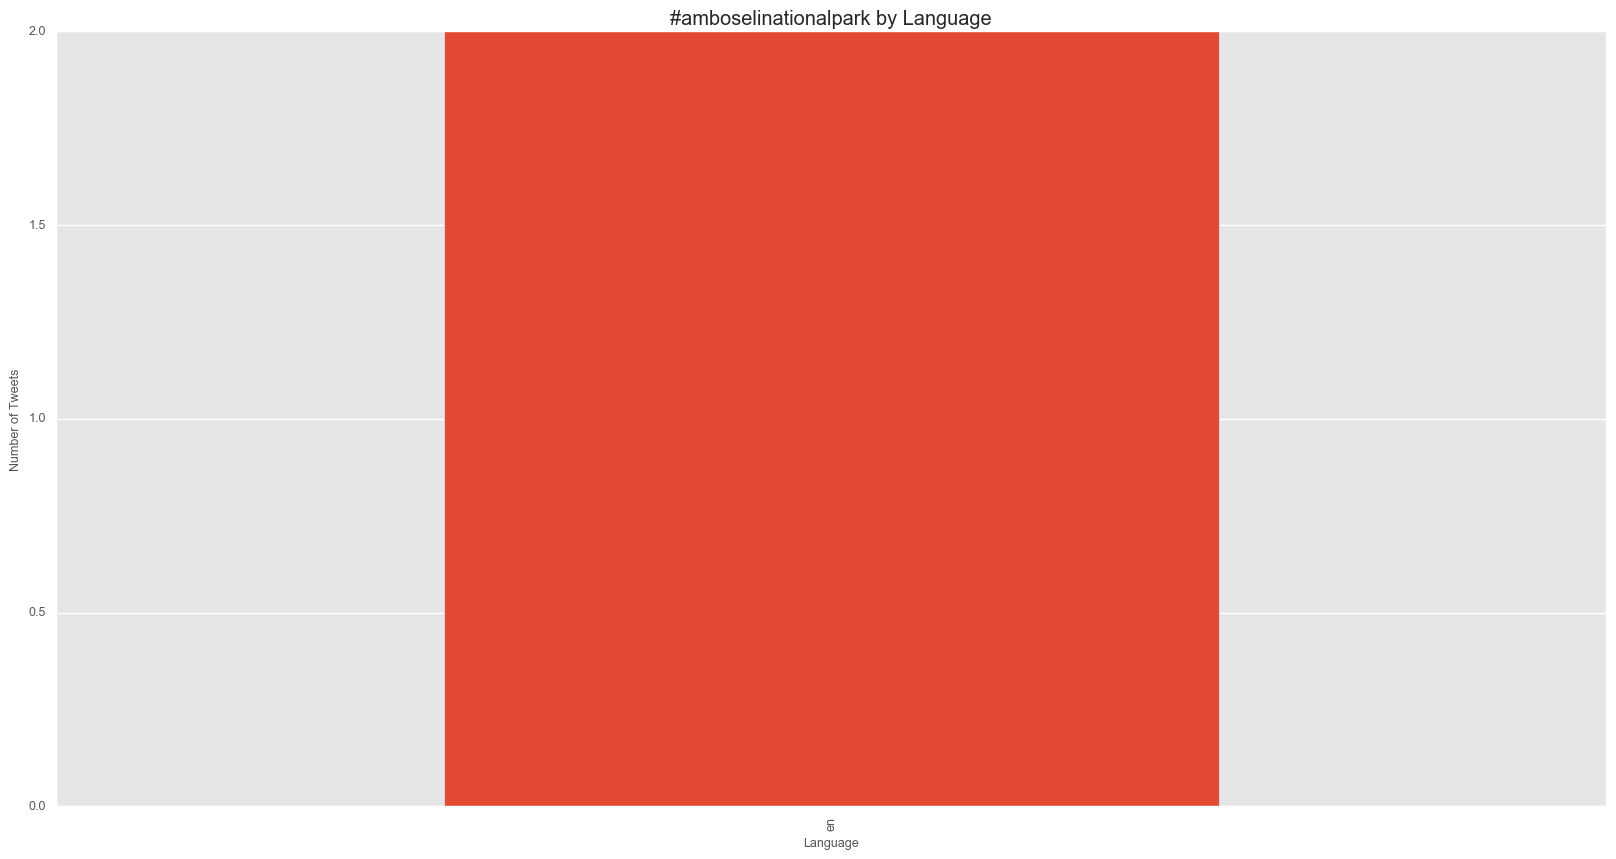

In [21]:
plot_tweets_per_category(tweets['lang'], "#amboselinationalpark by Language", 
                         "Language", 
                         "Number of Tweets", 
                         2000,
                         "amboselinationalpark_per_language.png")

/home/imaya/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


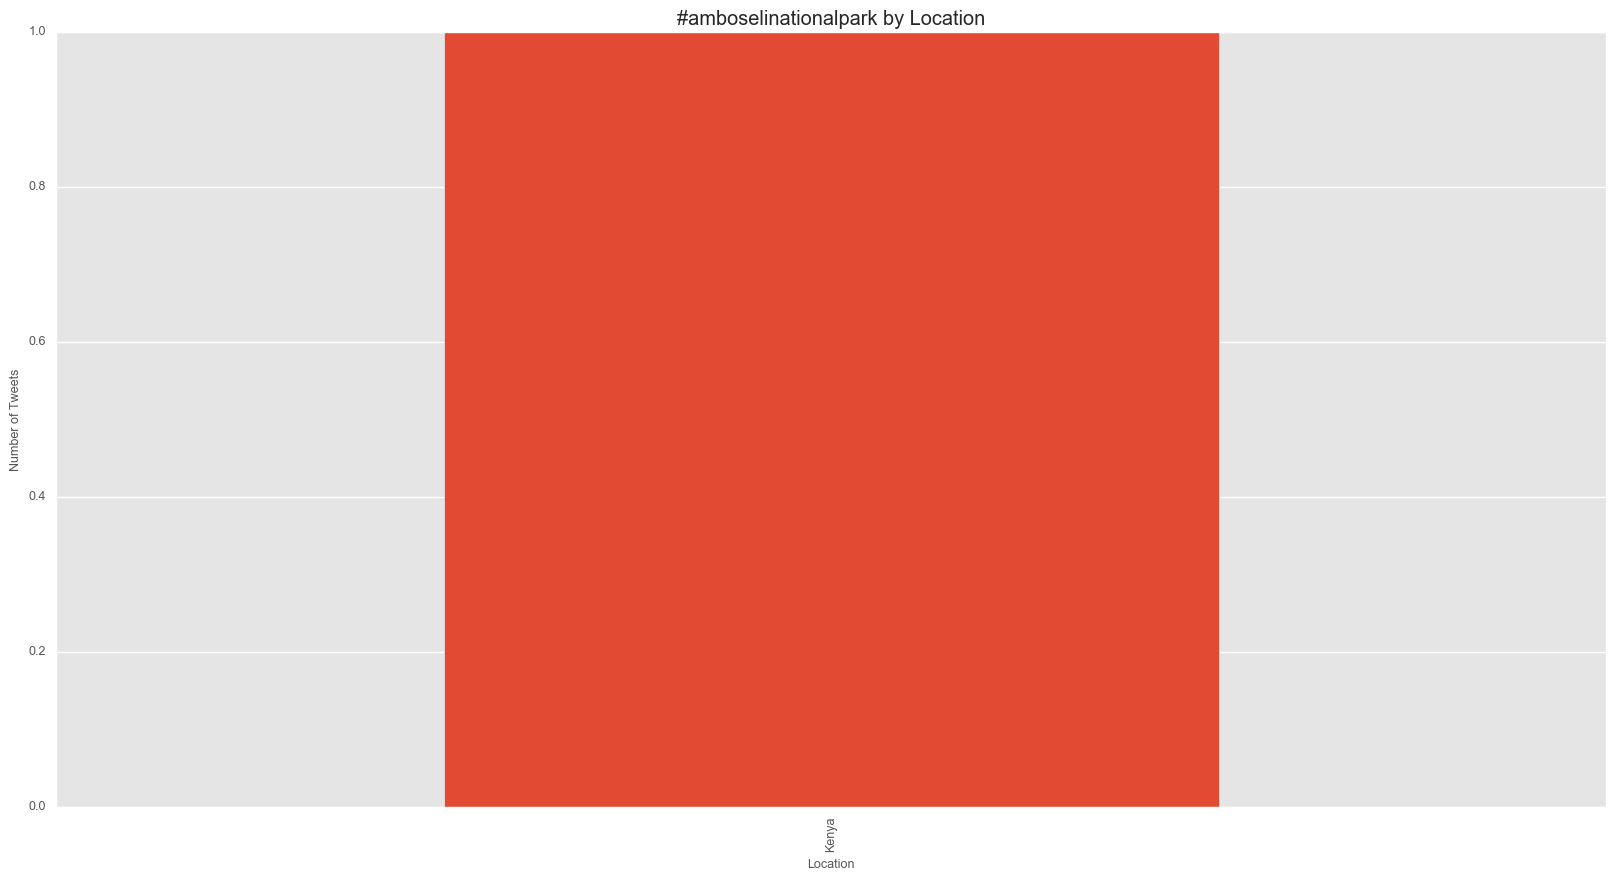

In [22]:
plot_tweets_per_category(tweets['Location'], 
                         "#amboselinationalpark by Location", 
                         "Location", 
                         "Number of Tweets", 2000,
                         "amboselinationalpark_per_location.png")

/home/imaya/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


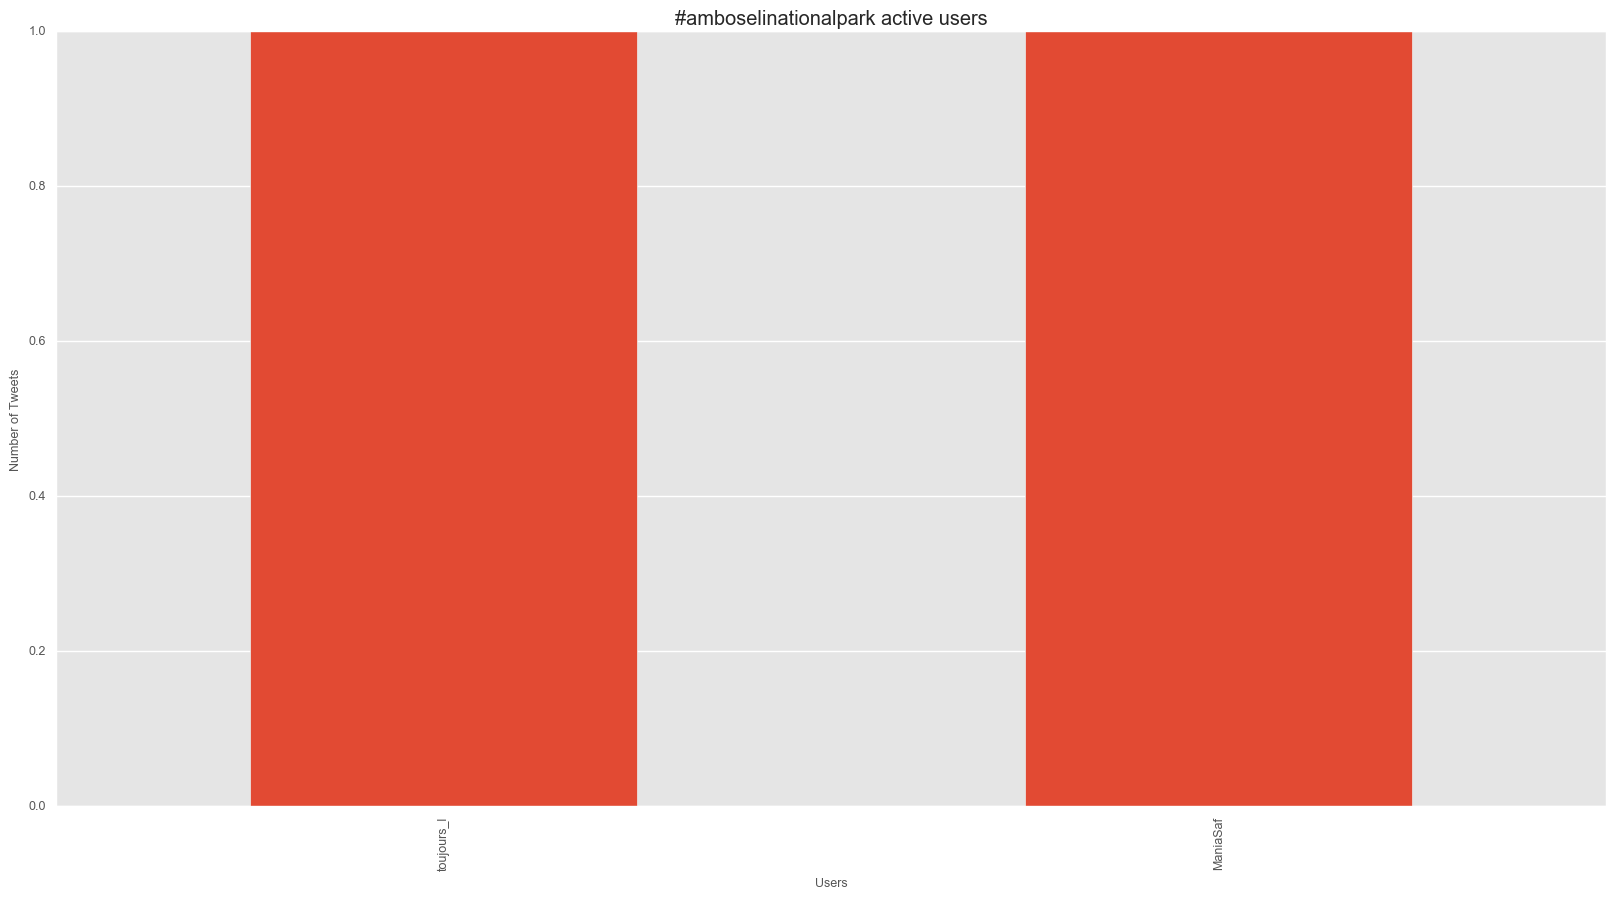

In [23]:
plot_tweets_per_category(tweets['user'], 
                         "#amboselinationalpark active users", 
                         "Users", 
                         "Number of Tweets", 20,
                         "amboselinationalpark_users.png")

In [24]:
def plot_distribution(category, title, x_title, y_title, output_filename="plot.png"):
    """
    :param category: Category plotted, can be users, language, country etc ..
    :param title: Title of the plot
    :param x_title: List of the items in x
    :param y_title: Title of the variable plotted
    :return: a plot that we can save as pdf or png instead of displaying to the screen
    """
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    sns.distplot(category.values, rug=True, hist=True);
    fig.savefig(output_filename)

/home/imaya/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


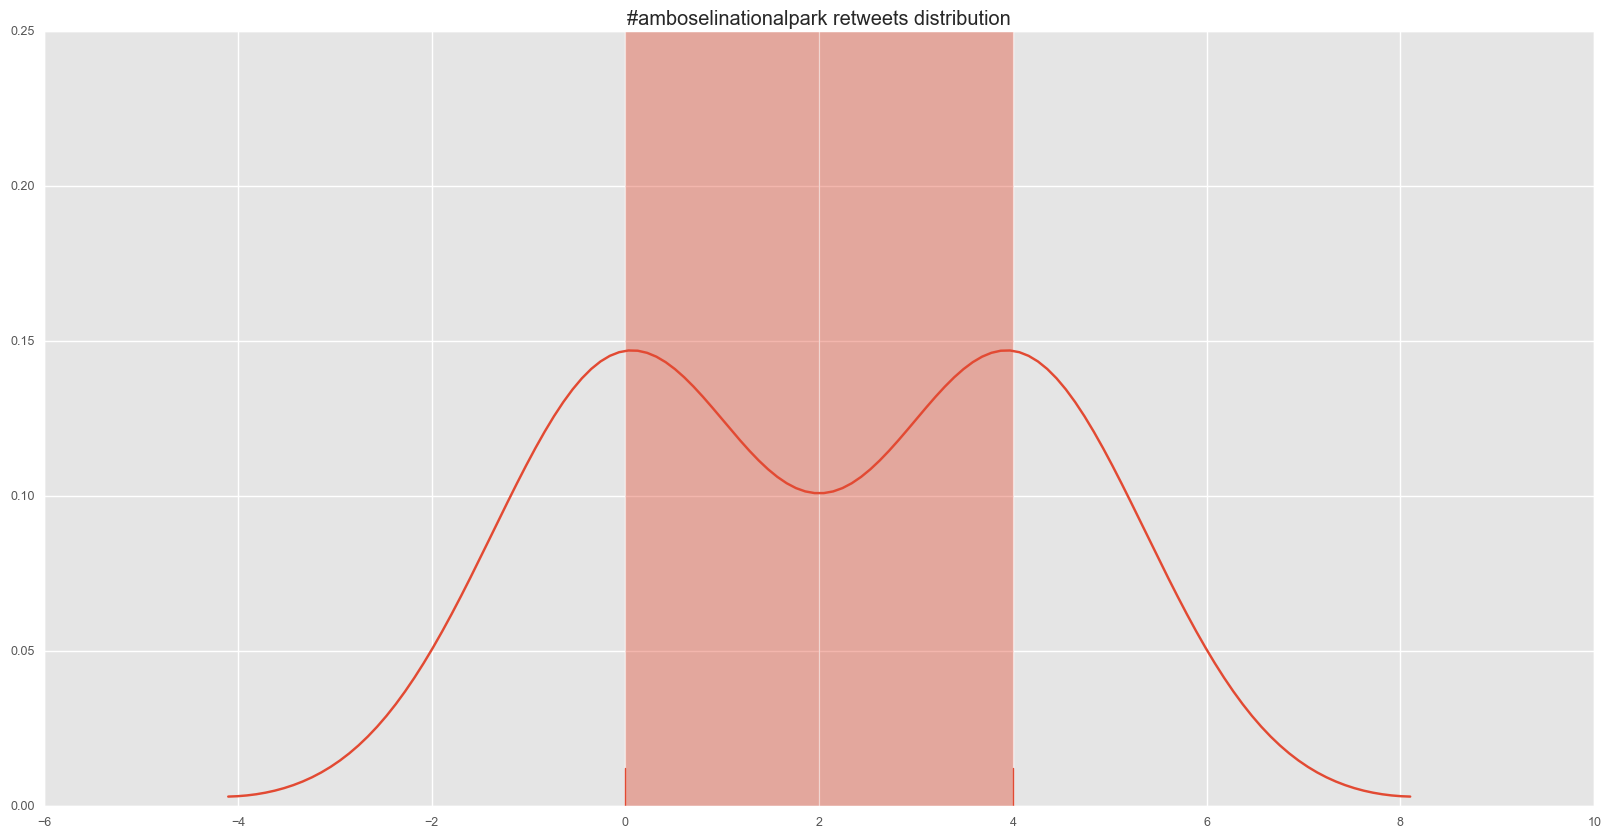

In [25]:
plot_distribution(tweets['retweet_count'], 
                  "#amboselinationalpark retweets distribution", "", "",
                  "retweets_distribution.png")

In [27]:
df = pd.DataFrame(tweets['created_at'].value_counts(), columns=['number_tweets'])
df['date'] = df.index
df.head()

,number_tweets,date


In [28]:
days = [item.split(" ")[0] for item in df['date'].values]
df['days'] = days
grouped_tweets = df[['days', 'number_tweets']].groupby('days')
tweet_growth = grouped_tweets.sum()
tweet_growth['days']= tweet_growth.index

tweet_growth

,number_tweets,days


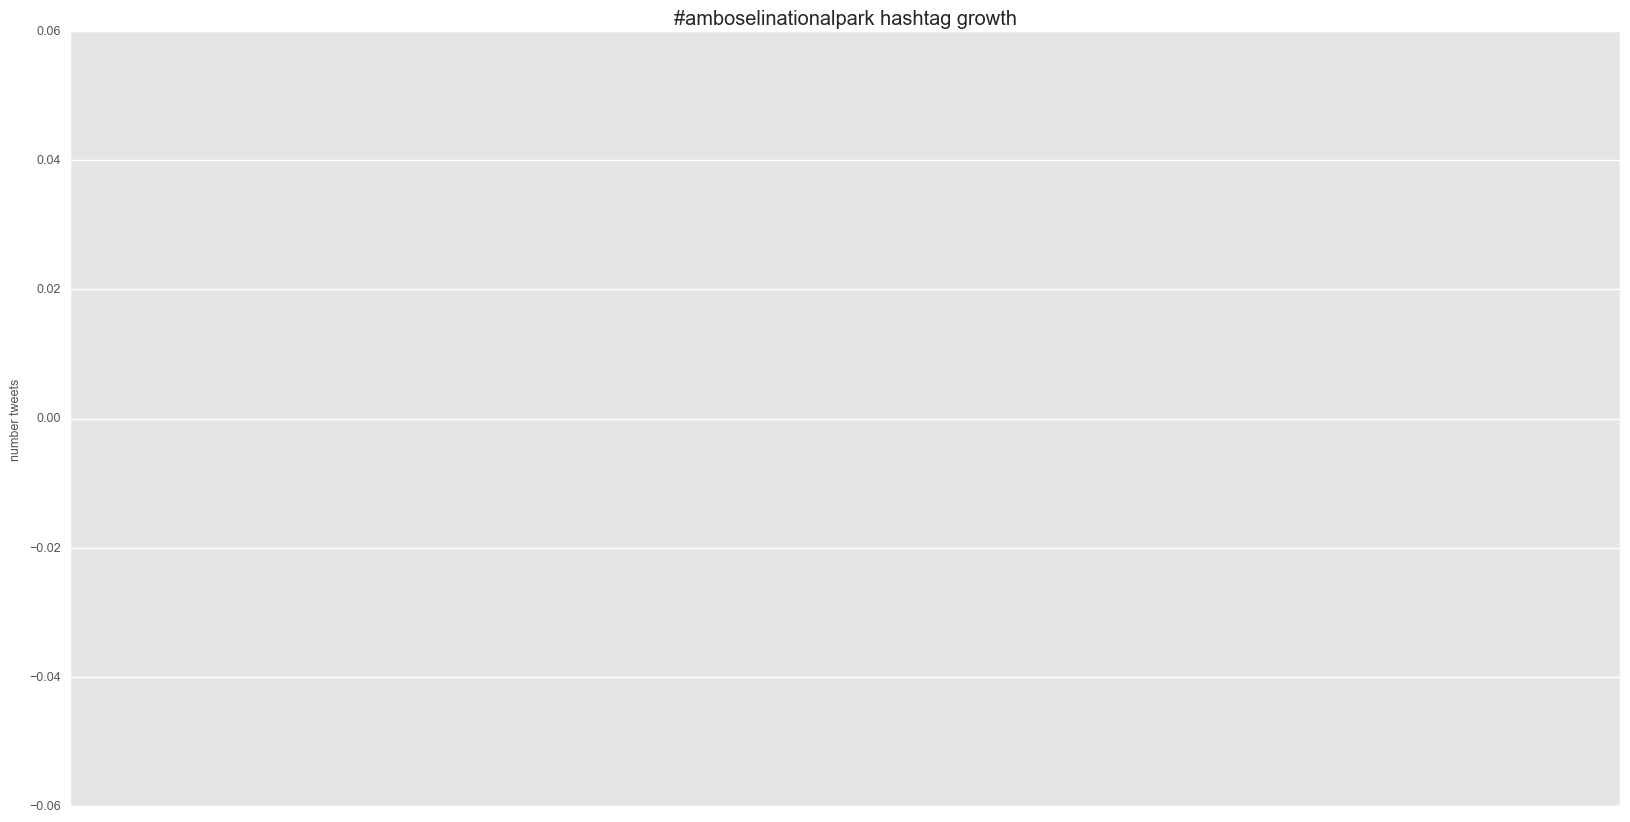

In [29]:
import numpy as np
fig = plt.figure()
ax = plt.subplot(111)
x_pos = np.arange(len(tweet_growth['days'].values))
ax.bar(x_pos, tweet_growth['number_tweets'].values, align='center')
ax.set_xticks(x_pos)
ax.set_title('#amboselinationalpark hashtag growth')
ax.set_ylabel("number tweets")
ax.set_xticklabels(tweet_growth['days'].values)
fig.savefig('amboselinationalpark_growth.png')

In [30]:
text = " ".join(tweets['text'].values.astype(str))

In [31]:
no_urls_no_tags = " ".join([word for word in text.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [32]:
moz_mask = imread("./twitter_mask.png", flatten=True)

/home/imaya/.local/lib/python3.5/site-packages/wordcloud/wordcloud.py:286: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0 and"


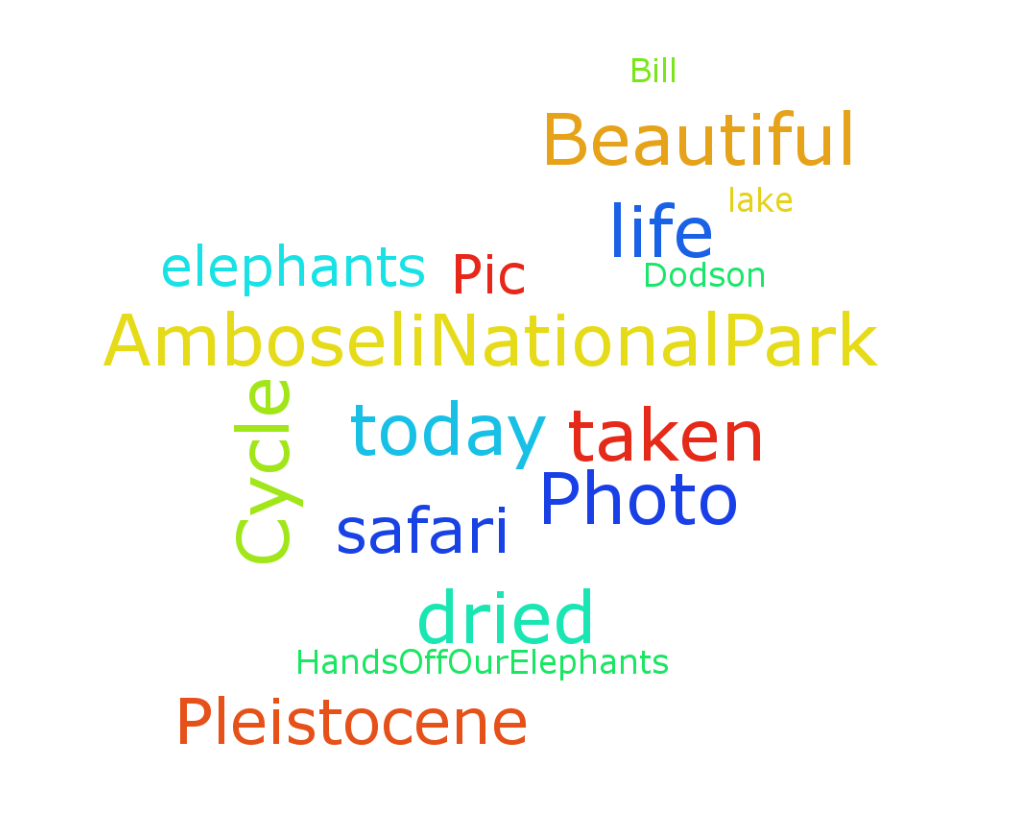

In [33]:
wc = WordCloud(background_color="white", font_path="/Library/Fonts/Verdana.ttf", stopwords=STOPWORDS, width=1800,
                      height=140, mask=moz_mask)
wc.generate(no_urls_no_tags)
plt.imshow(wc)
plt.axis("off")
plt.savefig('amboselinationalpark.png', dpi=300)